<a href="https://colab.research.google.com/github/kariru-k/datascienceportfolio/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com)

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

##  Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In order to observe the data first, we have to load the data into DataFrames using the pandas module

### Observations

In [3]:
observations = pd.read_csv("observations.csv")
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Here we see that the observations dataset has three columns


*   **scientific_name** - The scientific name of each species
*   **park_name** - The name of the national park
*   **observations** - The number of observations for the species in the park the past seven days




### Species_info

In [5]:
species_info = pd.read_csv("species_info.csv")
species_info.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [6]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We see that the species_info dataset has 4 columns


*   category - The category of species
*   scientific_name - The scientific name of the species
*   common_names - The common names of the species
*   conservation_status - The conservation status of the species



## Data Characteristics

In [8]:
print(f"Observation dataset shape: {observations.shape}")
print(f"Species dataset shape: {species_info.shape}")

Observation dataset shape: (23296, 3)
Species dataset shape: (5824, 4)


Here we can see that the `Observation` dataset has 23296 rows and 3 columns while the `Species` dataset has 5824 rows and 4 columns

# Exploratory Data Analysis

## Univariate Data Analysis

There will first be a check on the `species_info` dataset in order to comprehend the contents properly

### `species_info.species`

There will be a check to find out the number of distinct species in the national parks


In [13]:
print(f"Number of unique species: {species_info.scientific_name.nunique()}")

Number of unique species: 5541


There are 5541 unique species in the dataset. This indicates that there are a lot of distinct species in the parks

### `species_info.Category`

Next there will be a check on how many categories of species are there in total

In [14]:
print(f"Number of categories: {species_info.category.nunique()}")
print(f"Categories: {species_info.category.unique()}")

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


There are 7 categories of species including animals and plants. Next, a count of each category in the data

In [15]:
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

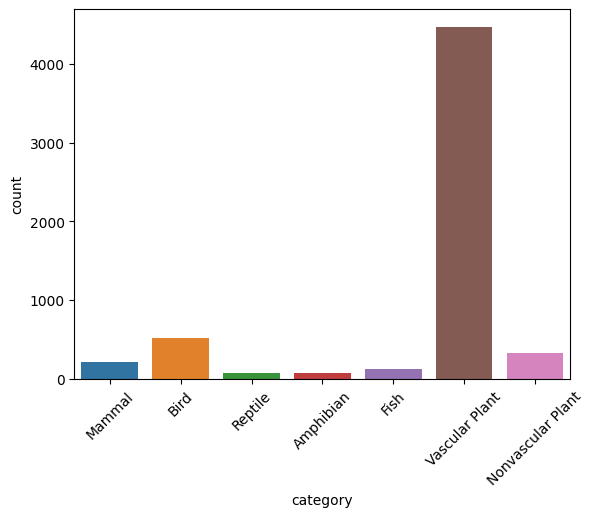

In [17]:
sns.countplot(x = "category", data = species_info)
plt.xticks(rotation = 45)

From the visualization above, It can be seen that the Vascular Plant category is by far the prevalent one, followed by the Bird category. Very few Reptiles, Amphibians and Fish were observed

`species_info.conservation_status`

Next, there will be